In [1]:
!pip install statannot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib import rc
from statannot import add_stat_annotation

%matplotlib inline

distance = pd.read_csv('Distance_data.csv')

In [2]:
print(distance)

   Untreated  Treated
0     1125.7    234.1
1     1439.9    262.6
2     1170.5    257.8


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Untreated v.s. Treated: t-test independent samples with Bonferroni correction, P_val=5.432e-04 stat=1.009e+01


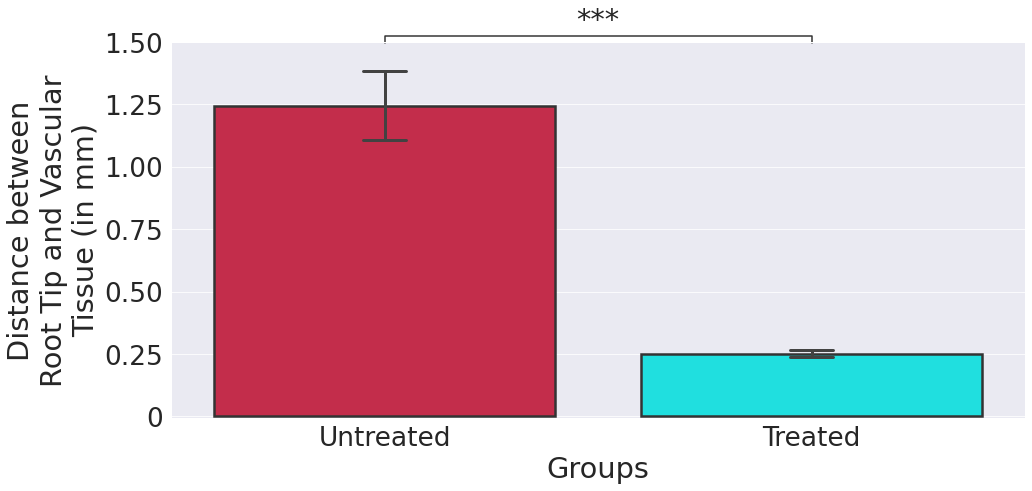

In [9]:
sns.set(font_scale=1.25)
sns.set_style('darkgrid')
plt.figure(figsize=(15,7.5))
sns.set_context('paper', font_scale=3)

palette = ['crimson', 'cyan']

ax = sns.barplot(x="variable", 
            y="value", 
            data=pd.melt(distance), 
            palette=palette,
            linewidth=2.5,
            capsize=0.1,
            errwidth=3,
            ci="sd",
            edgecolor=".2"
            )

add_stat_annotation(ax, 
                    data=distance, 
                    box_pairs=[("Untreated", "Treated")],
                    test='t-test_ind',
                    loc='outside'
                   )

plt.xlabel('Groups')           
plt.ylabel('Distance between\nRoot Tip and Vascular\nTissue (in mm)')
plt.ylim(-5,1500)
plt.xticks([0,1],['Untreated','Treated'])
plt.yticks([0,250,500,750,1000,1250,1500],['0','0.25','0.50','0.75','1.00','1.25','1.50'])
plt.tight_layout()
plt.savefig('distance_XFORCE1.png', dpi=300)
plt.show()

In [33]:
distance.describe()

Untreated     Treated
count     3.000000    3.000000
mean   1245.366667  251.500000
std     169.953445   15.258768
min    1125.700000  234.100000
25%    1148.100000  245.950000
50%    1170.500000  257.800000
75%    1305.200000  260.200000
max    1439.900000  262.600000